<a href="https://colab.research.google.com/github/kamalova/Capstone/blob/main/dataload_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
pd.set_option('display.max_colwidth', None)
import string
string.punctuation
import re
from sklearn.feature_extraction.text import TfidfVectorizer


# Data visualization
import seaborn as sns
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
%matplotlib inline
# Seaborn's beautiful styling
import seaborn as sns
sns.set_style('whitegrid', {'axes.facecolor': '0.9'})

# to get rid of the warnings
import warnings
warnings.filterwarnings("ignore")
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from nltk.tokenize import TweetTokenizer
from wordcloud import WordCloud

In [2]:
%rm -rf sample_data/

In [3]:
# Downloading datasets
reviews_sd = pd.read_csv('/content/reviews_sd.csv', compression='gzip', on_bad_lines='skip',
                       low_memory=False, nrows=10000);
reviews_scl = pd.read_csv('/content/reviews_scl.csv', compression='gzip', on_bad_lines='skip',
                       low_memory=False, nrows=10000);
reviews_scr = pd.read_csv('/content/reviews_scr.csv', compression='gzip', on_bad_lines='skip',
                       low_memory=False, nrows=10000);
reviews_sf = pd.read_csv('/content/reviews_sf.csv', compression='gzip', on_bad_lines='skip',
                       low_memory=False, nrows=10000);
reviews_sm = pd.read_csv('/content/reviews_sm.csv', compression='gzip', on_bad_lines='skip',
                       low_memory=False, nrows=10000);
reviews_la = pd.read_csv('/content/reviews_la.csv', compression='gzip', on_bad_lines='skip',
                       low_memory=False, nrows=10000);
reviews_oak = pd.read_csv('/content/reviews_oak.csv', compression='gzip', on_bad_lines='skip',
                       low_memory=False, nrows=10000);
reviews_pg = pd.read_csv('/content/reviews_pg.csv', compression='gzip', on_bad_lines='skip',
                       low_memory=False, nrows=10000);

In [8]:
print(reviews_sd.shape, reviews_scl.shape, reviews_scr.shape, reviews_sf.shape,
      reviews_sm.shape, reviews_la.shape, reviews_oak.shape, reviews_pg.shape
      )

(10000, 6) (10000, 6) (10000, 6) (10000, 6) (10000, 6) (10000, 6) (10000, 6) (10000, 6)


In [7]:
#reviews_sd


In [19]:
df_reviews = pd.concat([reviews_scl,reviews_scr, reviews_sd,reviews_sf,reviews_sm,reviews_la, reviews_oak, reviews_pg])

In [10]:
#df_reviews

In [103]:
df_reviews.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 50000 entries, 0 to 9999
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   listing_id     50000 non-null  int64 
 1   id             50000 non-null  int64 
 2   date           50000 non-null  object
 3   reviewer_id    50000 non-null  int64 
 4   reviewer_name  50000 non-null  object
 5   comments       49996 non-null  object
dtypes: int64(3), object(3)
memory usage: 2.7+ MB


In [11]:
df_reviews.isnull().sum()

listing_id       0
id               0
date             0
reviewer_id      0
reviewer_name    0
comments         4
dtype: int64

In [20]:
df_reviews = df_reviews.drop(columns=['id','date','reviewer_name'])

In [21]:
df_reviews.dropna(subset =['comments'],how='any',axis=0,inplace=True)

In [14]:
! pip install langdetect

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 981 kB 5.2 MB/s 
  Created wheel for langdetect: filename=langdetect-1.0.9-py3-none-any.whl size=993242 sha256=964115155ddb4a0c1f914ed93cf3d97eeb59a3f73f7db5d27d20edd898b4a347
  Stored in directory: /root/.cache/pip/wheels/c5/96/8a/f90c59ed25d75e50a8c10a1b1c2d4c402e4dacfa87f3aff36a
Successfully built langdetect


In [15]:
# Language detect
from langdetect import detect

In [22]:
def detect_lang(x):
    try:
        lang = detect(x)
    except:
        lang = 'other'
    return lang

df_reviews['language'] = df_reviews['comments'].apply(detect_lang)

In [23]:
df_reviews

,listing_id,reviewer_id,comments,language
0,26445399,3558426,This cottage has everything you need and is centerally locates on the peninsula. Walking access to great restaurants in Palo Alto. Short drive or bike ride to Stanford’s campus.,en
1,26445399,8627033,Enjoyed our stay very much and would stay here again.,en
2,26445399,75784163,"Great studio in the heart of Menlo Park, close to Downtown Palo Alto and restaurants! The studio is not huge but very well arranged, and contains everything we needed during our stay. Sandra was super helpful, I can only recommend you stay at her place!",en
3,26445399,259305933,"Great location, friendly community, safe, beautiful neighborhood, very walkable. Property matched description. I would recommend.<br/> <br/>Sandra and Carl were also very accomodating and offered thoughtful recommendations.",en
4,26445399,43307267,Sandra is super nice and friendly. The place has almost everything we need. There are restaurants and markets within walking distance. I can't ask for more at this price. Really enjoy the stay.,en
...,...,...,...,...
9995,7753356,19358386,My husband and I enjoyed our stay with Li. Li ensured that everything went smoothly with prompt and clear communication. The unit was sparkling clean which we really appreciate. Big bonus - delicious homemade apple pie - yum! Thanks Li!,en
9996,7753356,28510914,"This is an amazing place to stay if you're interested in exploring the Pebble Beach / Monterey / Carmel area -- very centrally located and includes great amenities such as free access to the 17-mi Drive and guest passes to the Monterey aquarium. Li is very kind and helpful, quickly responds to all messages and is more than happy to offer tips and suggestions on what you can do while in town. The suite where you will be staying is very nicely arranged and includes all the amenities you might need for a short vacation. A true gem! We would definitely come back!",en
9997,7753356,105058889,Li’s place is quiet and clean. We arrived later in the night and even saw some friendly deer. Li’s place is quite cozy and the bed is comfortable. We took advantage of the free aquarium tickets and enjoyed our trip to Monterey. Would definitely recommend!,en
9998,7753356,111435487,We had a great stay at Li’s place! She is very sweet and also responds quickly. She makes sure that we are comfortable and have everything you need. The location is amazing and is so peaceful. The place is small but is perfect for two people and has everything you need. Shower products are also provided. After checking out we went to Carmel beach which is only a few minutes away from Li’s place. We thoroughly enjoyed the place and the Monterey passes and would love to be back next time!,en


In [24]:
df_reviews.language.value_counts()

en       77142
fr         791
de         515
zh-cn      329
es         256
ro         155
it          94
ko          76
other       75
nl          69
af          57
pt          56
ja          42
ca          42
ru          32
so          31
sv          28
da          25
cs          24
tl          24
no          22
zh-tw       15
cy          13
sw          13
hu          11
hr          11
pl           8
id           8
et           7
fi           6
tr           3
vi           3
sk           3
sl           3
lt           1
th           1
lv           1
he           1
Name: language, dtype: int64

In [25]:
df_reviews.loc[df_reviews['language']=='id']

,listing_id,reviewer_id,comments,language
1505,75284,20578505,Superb! Everlasting memory!,id
6914,3440809,367856585,Fabulous,id
2176,24548,25823348,Superb!,id
4067,62274,33649053,Thanks Isabel!,id
1105,75284,20578505,Superb! Everlasting memory!,id
764,5728,207636891,"Gut, sauber",id
5335,4099680,24649468,Fabulous,id
9289,7462535,77068279,Bargain stay,id


In [26]:
df_reviews.loc[df_reviews['language']=='sl']

,listing_id,reviewer_id,comments,language
7551,396390,302328383,Good Spot,sl
9134,1620295,266266738,Love it,sl
9849,883762,175733069,"Love, love, loved it!",sl


In [27]:
df_reviews.loc[df_reviews['language']=='et']

,listing_id,reviewer_id,comments,language
5050,153903,352085335,Just as amazing as it looks!,et
9926,76561,24345152,Solid host.,et
1875,208186,407016732,See private,et
2272,242472,65829087,Good value,et
2962,296928,6214993,Solid,et
5509,583395,78013667,Just ask Karen,et
8199,806104,43531358,Must see,et


In [28]:
df_reviews.loc[df_reviews['language']=='pl']

,listing_id,reviewer_id,comments,language
9358,438786,180903055,Very cozy.,pl
5524,12522,71398258,Very nice,pl
6064,912970,91578646,Very cozy!,pl
1669,208186,35128422,Very nice,pl
3640,348534,113251047,cozy!,pl
9267,871044,41149932,So cozy!,pl
9352,871044,344014078,Cozy place .,pl
6137,4162387,183146673,Cozy little spot❤,pl


In [29]:
df_reviews.loc[df_reviews['language']=='hr']

,listing_id,reviewer_id,comments,language
1425,8357,253496893,Amazing place <3,hr
3499,70829,7836245,amazing place!,hr
5429,62949,36586450,Amazing place!,hr
7588,396390,412587297,No privacy,hr
4724,258873,235588434,Amazing place!,hr
6142,912970,535558,Amazing place!,hr
6761,1115287,228552193,amazing place!,hr
4131,67089,99818452,Amazing place,hr
5545,9140,12335726,Amazing spot.,hr
8231,254259,74539858,good place,hr


In [30]:
df_reviews = df_reviews.loc[(df_reviews['language'] == 'en')] 

In [31]:
df_reviews.language.value_counts()

en    77142
Name: language, dtype: int64

In [32]:
def clean_text(text):
    '''
    input- 'text' to be preprocessed
    output- converts input 'text' to lowercase,remove square brackets,links,punctuation 
    and words containing numbers. Removes common accent characters and returns clean text. 
    '''
    text = text.lower()
    text = re.sub('<br\s?\/>|<br>',"", text)
    text = re.sub(r'[^a-zA-Z0-9]', ' ', text) # removes punctuations
    text = re.sub('\[.*?\]', '', text)
    text = re.sub('\w*\d\w*', ' ', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text) 
    return text

In [33]:
df_reviews['comments'] = df_reviews['comments'].apply(lambda x: clean_text(x))
df_reviews.head()

,listing_id,reviewer_id,comments,language
0,26445399,3558426,this cottage has everything you need and is centerally locates on the peninsula walking access to great restaurants in palo alto short drive or bike ride to stanford s campus,en
1,26445399,8627033,enjoyed our stay very much and would stay here again,en
2,26445399,75784163,great studio in the heart of menlo park close to downtown palo alto and restaurants the studio is not huge but very well arranged and contains everything we needed during our stay sandra was super helpful i can only recommend you stay at her place,en
3,26445399,259305933,great location friendly community safe beautiful neighborhood very walkable property matched description i would recommend sandra and carl were also very accomodating and offered thoughtful recommendations,en
4,26445399,43307267,sandra is super nice and friendly the place has almost everything we need there are restaurants and markets within walking distance i can t ask for more at this price really enjoy the stay,en


In [34]:
def remove_emoji(text):
    emoji_pattern = re.compile("["
    u"\U0001F600-\U0001F64F"  # emoticons
    u"\U0001F300-\U0001F5FF"  # symbols & pictographs
    u"\U0001F680-\U0001F6FF"  # transport & map symbols
    u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
    u"\U00002702-\U000027B0"
    u"\U000024C2-\U0001F251"
    "]+", flags=re.UNICODE)
    return emoji_pattern.sub(r'', text)

In [35]:
df_reviews['comments'] = df_reviews['comments'].apply(lambda x: remove_emoji(x))

In [36]:
df_reviews.reset_index(inplace=True, drop=True)

In [37]:
df_reviews['text_length'] = df_reviews['comments'].apply(lambda x : len(x))
df_reviews.head(4)

,listing_id,reviewer_id,comments,language,text_length
0,26445399,3558426,this cottage has everything you need and is centerally locates on the peninsula walking access to great restaurants in palo alto short drive or bike ride to stanford s campus,en,179
1,26445399,8627033,enjoyed our stay very much and would stay here again,en,53
2,26445399,75784163,great studio in the heart of menlo park close to downtown palo alto and restaurants the studio is not huge but very well arranged and contains everything we needed during our stay sandra was super helpful i can only recommend you stay at her place,en,253
3,26445399,259305933,great location friendly community safe beautiful neighborhood very walkable property matched description i would recommend sandra and carl were also very accomodating and offered thoughtful recommendations,en,214


In [38]:
import nltk
nltk.download('wordnet')
nltk.download('omw-1.4')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


True

In [39]:
#df_reviews

In [40]:
df_reviews.head()

,listing_id,reviewer_id,comments,language,text_length
0,26445399,3558426,this cottage has everything you need and is centerally locates on the peninsula walking access to great restaurants in palo alto short drive or bike ride to stanford s campus,en,179
1,26445399,8627033,enjoyed our stay very much and would stay here again,en,53
2,26445399,75784163,great studio in the heart of menlo park close to downtown palo alto and restaurants the studio is not huge but very well arranged and contains everything we needed during our stay sandra was super helpful i can only recommend you stay at her place,en,253
3,26445399,259305933,great location friendly community safe beautiful neighborhood very walkable property matched description i would recommend sandra and carl were also very accomodating and offered thoughtful recommendations,en,214
4,26445399,43307267,sandra is super nice and friendly the place has almost everything we need there are restaurants and markets within walking distance i can t ask for more at this price really enjoy the stay,en,193


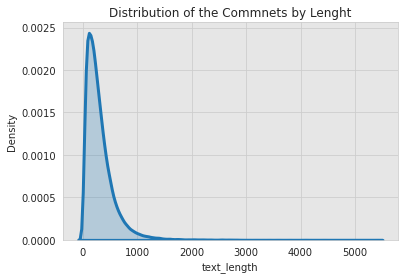

In [41]:
# Plot distribution of the Comment Lenghth
sns.distplot(df_reviews['text_length'],hist = False, kde = True,
                 kde_kws = {'shade': True, 'linewidth': 3}).set(title='Distribution of the Commnets by Lenght')
plt.show();

In [145]:
df_reviews.shape

(77143, 8)

In [151]:
df_reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 77143 entries, 0 to 77142
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   listing_id   77143 non-null  int64 
 1   reviewer_id  77143 non-null  int64 
 2   comments     77143 non-null  object
 3   language     77143 non-null  object
 4   text_length  77143 non-null  int64 
dtypes: int64(3), object(2)
memory usage: 2.9+ MB


In [42]:
df_reviews

,listing_id,reviewer_id,comments,language,text_length
0,26445399,3558426,this cottage has everything you need and is centerally locates on the peninsula walking access to great restaurants in palo alto short drive or bike ride to stanford s campus,en,179
1,26445399,8627033,enjoyed our stay very much and would stay here again,en,53
2,26445399,75784163,great studio in the heart of menlo park close to downtown palo alto and restaurants the studio is not huge but very well arranged and contains everything we needed during our stay sandra was super helpful i can only recommend you stay at her place,en,253
3,26445399,259305933,great location friendly community safe beautiful neighborhood very walkable property matched description i would recommend sandra and carl were also very accomodating and offered thoughtful recommendations,en,214
4,26445399,43307267,sandra is super nice and friendly the place has almost everything we need there are restaurants and markets within walking distance i can t ask for more at this price really enjoy the stay,en,193
...,...,...,...,...,...
77137,7753356,19358386,my husband and i enjoyed our stay with li li ensured that everything went smoothly with prompt and clear communication the unit was sparkling clean which we really appreciate big bonus delicious homemade apple pie yum thanks li,en,240
77138,7753356,28510914,this is an amazing place to stay if you re interested in exploring the pebble beach monterey carmel area very centrally located and includes great amenities such as free access to the mi drive and guest passes to the monterey aquarium li is very kind and helpful quickly responds to all messages and is more than happy to offer tips and suggestions on what you can do while in town the suite where you will be staying is very nicely arranged and includes all the amenities you might need for a short vacation a true gem we would definitely come back,en,564
77139,7753356,105058889,li s place is quiet and clean we arrived later in the night and even saw some friendly deer li s place is quite cozy and the bed is comfortable we took advantage of the free aquarium tickets and enjoyed our trip to monterey would definitely recommend,en,255
77140,7753356,111435487,we had a great stay at li s place she is very sweet and also responds quickly she makes sure that we are comfortable and have everything you need the location is amazing and is so peaceful the place is small but is perfect for two people and has everything you need shower products are also provided after checking out we went to carmel beach which is only a few minutes away from li s place we thoroughly enjoyed the place and the monterey passes and would love to be back next time,en,491


In [43]:
# Tfidfvectorizer computes word counts, idf and tf-idf values all at once
 
# compute IDF values (Inverse Document Frequency), weight assigned to each word depending on how commonly used
vectorizer = TfidfVectorizer(min_df=53, max_features=50, stop_words='english', ngram_range=(1,2), use_idf=True)
matrix = vectorizer.fit_transform(df_reviews['comments'])


In [44]:
# see first vector, IDF values for first comment

pd.DataFrame(matrix[0].T.todense(), index=vectorizer.get_feature_names(), 
             columns=["tfidf"]).sort_values(['tfidf'], ascending=False).style.bar(subset=['tfidf'], color=['#5fba7d'])

,tfidf
cottage,0.582621
need,0.554900
restaurants,0.524398
great,0.278649
amazing,0.000000
quiet,0.000000
location,0.000000
loved,0.000000
lovely,0.000000
needed,0.000000


In [45]:
df_reviews['comments'][27]

'great place  great host  great location  enough said'

### Estimate polarity

In [46]:
import nltk
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


True

In [48]:
analyzer = SentimentIntensityAnalyzer()

In [49]:
# test it out on first comment

def sentiment_analyzer_scores(comment):
    score = analyzer.polarity_scores(comment)
    return(pd.DataFrame.from_dict(score, orient='index'))

sentiment_analyzer_scores(df_reviews['comments'][27])

,0
neg,0.0000
neu,0.2890
pos,0.7110
compound,0.9231


In [50]:
# we want one overall polarity score, so just look at the 'compound' score

compound_polarity= lambda s: (analyzer.polarity_scores(s))['compound']

In [51]:
df_reviews['polarity'] = df_reviews.comments.map(compound_polarity)

In [52]:
df_reviews[:5].style.bar(subset=['polarity'], align='mid', color=['#d65f5f', '#5fba7d'])

,listing_id,reviewer_id,comments,language,text_length,polarity
0,26445399,3558426,this cottage has everything you need and is centerally locates on the peninsula walking access to great restaurants in palo alto short drive or bike ride to stanford s campus,en,179,0.624900
1,26445399,8627033,enjoyed our stay very much and would stay here again,en,53,0.510600
2,26445399,75784163,great studio in the heart of menlo park close to downtown palo alto and restaurants the studio is not huge but very well arranged and contains everything we needed during our stay sandra was super helpful i can only recommend you stay at her place,en,253,0.954900
3,26445399,259305933,great location friendly community safe beautiful neighborhood very walkable property matched description i would recommend sandra and carl were also very accomodating and offered thoughtful recommendations,en,214,0.959500
4,26445399,43307267,sandra is super nice and friendly the place has almost everything we need there are restaurants and markets within walking distance i can t ask for more at this price really enjoy the stay,en,193,0.924500


In [53]:
df_reviews[df_reviews['polarity']<0][:5].style.bar(subset=['polarity'], align='mid', color=['#d65f5f', '#5fba7d'])

,listing_id,reviewer_id,comments,language,text_length,polarity
23,20802498,23736851,do not pay more than for this house otherwise get a hotel room as until renovated just a bit this is not a good catch,en,122,-0.275500
59,1353178,1544808,rob and vic family class acts,en,33,-0.557400
400,2943488,66031497,good location well organized place but very bad communication host wanted to charge extra then for every min after posted check out time after i called and the host confirmed it was ok i called apologizing for still being there host said was ok to be late and would call me back the host had not call back and i left the place noon the host then demanded extra fees i refused,en,403,-0.570400
555,1364787,168462305,the host carina had a very strict cancellation policy so i didn t get a chance to stay there i tried to get a refund and carina offered only the cleaning fee but i never saw that the cleaning fee was refunded i was not happy dealing with her because she was not flexible and would not give me my money back even though i gave her plenty of notice that my brother forgot about my trip the host was not understanding at all this was stressful to deal with be aware that she will not give you a refund at all,en,516,-0.869400
581,1364787,342057388,this is the worst travel experience i have ever had do not stay with this host unless you want to be stranded in a strange city with nowhere to stay i flew into the us with the two doses of the pfizer vaccine plus the covid test required by delta airlines i told the host carina that i was flying directly from buenos aires and she accepted both my booking and payment i hidden by airbnb ed her from the airport to tell her i had arrived at pm she asked when i would be coming when i arrived at her house less than hours later she told me i had to be quarantined in a hotel for days nowhere in the airbnb home description nor during our hidden by airbnb exchanges was there any mention of quarantine yet she wouldn t let me in her house i was left out in the streets and had to call the police i am years old and it was extremely upsetting to be stranded in a foreign city airbnb has been involved and ruled in my favor and thankfully reimbursed the whole amount of the booking plus fifty percent of the sheraton hotel bill do not recommend,en,1069,-0.542800


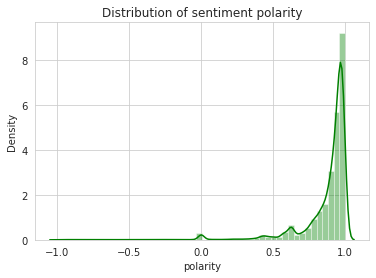

In [230]:
sns.distplot(df_reviews['polarity'], norm_hist=True, color='g')
plt.title('Distribution of sentiment polarity');

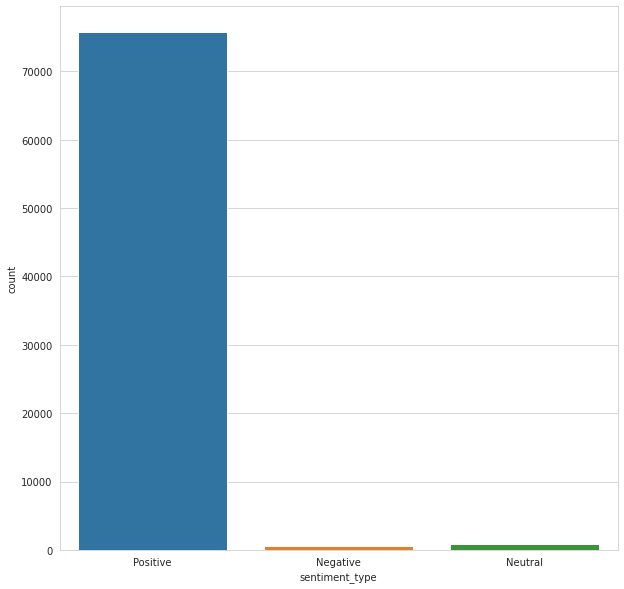

In [54]:
def f(df_reviews):
    if df_reviews['polarity'] > 0:
        val = "Positive"
    elif df_reviews['polarity'] == 0:
        val = "Neutral"
    else:
        val = "Negative"
    return val

df_reviews['sentiment_type'] = df_reviews.apply(f, axis=1)

plt.figure(figsize=(10,10))
sns.set_style("whitegrid")
ax = sns.countplot(x="sentiment_type", data=df_reviews)

In [55]:
df_reviews[df_reviews['sentiment_type']=='Neutral'][:10].style.bar(subset=['polarity'],align='mid', color=['#d65f5f', '#5fba7d'])

,listing_id,reviewer_id,comments,language,text_length,polarity,sentiment_type
223,4952,4130118,the host provided a key to the property and upon arrival provided for a tour of the property the host often met us at the door as we returned for the evening,en,160,0.000000,Neutral
252,4952,110497961,convenient place for visiting stanford,en,38,0.000000,Neutral
331,2894634,12141334,vic is a very attentive host,en,28,0.000000,Neutral
533,21373,2184084,this is a spectacular place with spectacular people,en,53,0.000000,Neutral
573,1364787,136847697,it was indeed a cozy room,en,25,0.000000,Neutral
601,21373,15627492,the reservation was canceled days before arrival this is an automated posting,en,81,0.000000,Neutral
666,21373,6148628,the host canceled this reservation days before arrival this is an automated posting,en,87,0.000000,Neutral
670,3104528,8751897,the reservation was canceled days before arrival this is an automated posting,en,81,0.000000,Neutral
693,21373,74106708,the host canceled this reservation days before arrival this is an automated posting,en,87,0.000000,Neutral
794,21373,186496708,incredible place with incredible people,en,41,0.000000,Neutral


In [57]:
df_reviews['comments'].str.match('the host canceled this reservation days before arrival this is an automated posting	').sum()

0

In [64]:
#discard = ["is an automated posting"]
#df_reviews = df_reviews[df_reviews['comments'].str.contains('|'.join(discard))]

In [63]:
df_reviews[df_reviews['sentiment_type']=='Neutral'][:15].style.bar(subset=['polarity'], align='mid', color=['#d65f5f', '#5fba7d'])

,listing_id,reviewer_id,comments,language,text_length,polarity,sentiment_type


In [62]:
df_reviews

,listing_id,reviewer_id,comments,language,text_length,polarity,sentiment_type
601,21373,15627492,the reservation was canceled days before arrival this is an automated posting,en,81,0.0,<pandas.io.formats.style.Styler object at 0x7f793d0c5f50>
666,21373,6148628,the host canceled this reservation days before arrival this is an automated posting,en,87,0.0,<pandas.io.formats.style.Styler object at 0x7f793d0c5f50>
670,3104528,8751897,the reservation was canceled days before arrival this is an automated posting,en,81,0.0,<pandas.io.formats.style.Styler object at 0x7f793d0c5f50>
693,21373,74106708,the host canceled this reservation days before arrival this is an automated posting,en,87,0.0,<pandas.io.formats.style.Styler object at 0x7f793d0c5f50>
2247,118903,2351278,the reservation was canceled days before arrival this is an automated posting,en,81,0.0,<pandas.io.formats.style.Styler object at 0x7f793d0c5f50>
...,...,...,...,...,...,...,...
73926,5107382,105890072,the host canceled this reservation days before arrival this is an automated posting,en,87,0.0,<pandas.io.formats.style.Styler object at 0x7f793d0c5f50>
73927,5107382,25140605,the host canceled this reservation days before arrival this is an automated posting,en,87,0.0,<pandas.io.formats.style.Styler object at 0x7f793d0c5f50>
74441,5238711,68590377,the host canceled this reservation days before arrival this is an automated posting,en,87,0.0,<pandas.io.formats.style.Styler object at 0x7f793d0c5f50>
74482,5500336,9360639,the reservation was canceled days before arrival this is an automated posting,en,81,0.0,<pandas.io.formats.style.Styler object at 0x7f793d0c5f50>


In [65]:
pos_reviews = df_reviews[df_reviews['sentiment_type']=='Positive']

In [66]:
neg_reviews = df_reviews[df_reviews['sentiment_type']=='Negative']

In [67]:
pos_reviews =  ''.join(pos_reviews['comments'])

In [68]:
neg_reviews =  ''.join(neg_reviews['comments'])

In [80]:
from PIL import Image
mask = np.array(Image.open(r'/content/pos_image.png'))

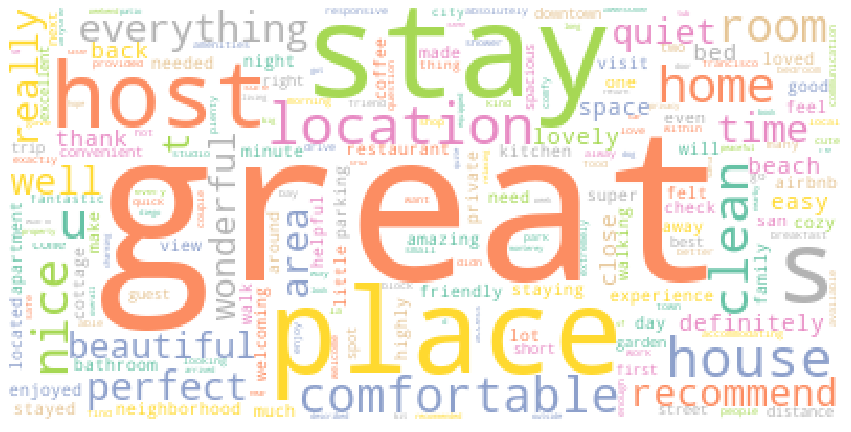

In [92]:
from wordcloud.wordcloud import STOPWORDS
# Collocation argument is set to FALSE to ensure that the word cloud doesn’t contain any bigrams or duplicate words
pos_wordcloud = WordCloud(stopwords=set(STOPWORDS), colormap='Set2',collocations=False, mode="RGBA", background_color="white").generate(pos_reviews)

plt.figure(figsize=(15,10))
plt.axis('off')
plt.imshow(pos_wordcloud, interpolation="None")

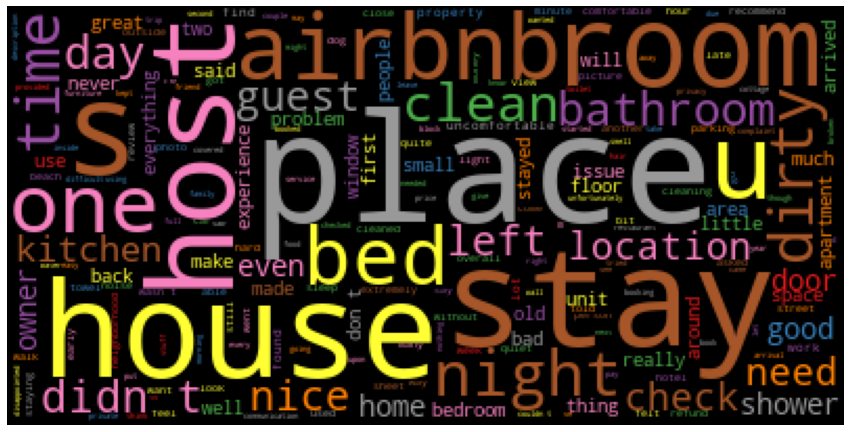

In [90]:
neg_wordcloud = WordCloud(stopwords=set(STOPWORDS),repeat=False, colormap='Set1', background_color="black").generate(neg_reviews)

plt.figure(figsize=(15,10))
plt.axis('off')
plt.imshow(neg_wordcloud)

In [ ]:
#df_reviews.to_csv('df_reviews_polarity.csv', index=False)

In [170]:
from nltk.util import ngrams

def ngram_convertor(df,n=3):

  def ngramconvert(df,n=3):
    for item in df.columns:
        df['new'+item]=df[item].apply(lambda sentence: list(ngrams(sentence.split(), n)))
    return df

In [198]:
# Remove Stopwords
#df_reviews['comments'] = df_reviews.str.replace("[^\w\s]", "")
df_reviews['comments'] = df_reviews['comments'].apply(lambda words: [word for word in words if word not in stop])

In [139]:
from nltk.stem.wordnet import WordNetLemmatizer

tokenizer = nltk.tokenize.WhitespaceTokenizer()
lemmatizer = WordNetLemmatizer()
def lemmatize_text(text):
   return [lemmatizer.lemmatize(w) for w in tokenizer.tokenize(text)]

df_reviews['comments'] = df_reviews.comments.apply(lemmatize_text)

#df_reviews = dataset.assign(col_lemma = dataset.col.apply(lambda x: lemmatize(x))

In [153]:
df_reviews['comments'] = df_reviews['comments'].apply(str)

In [197]:
# Import stopwords with nltk.
from nltk.corpus import stopwords
stop = set(stopwords.words('english'))